# Polynomial fitting for a ND data

<IPython.core.display.Javascript object>


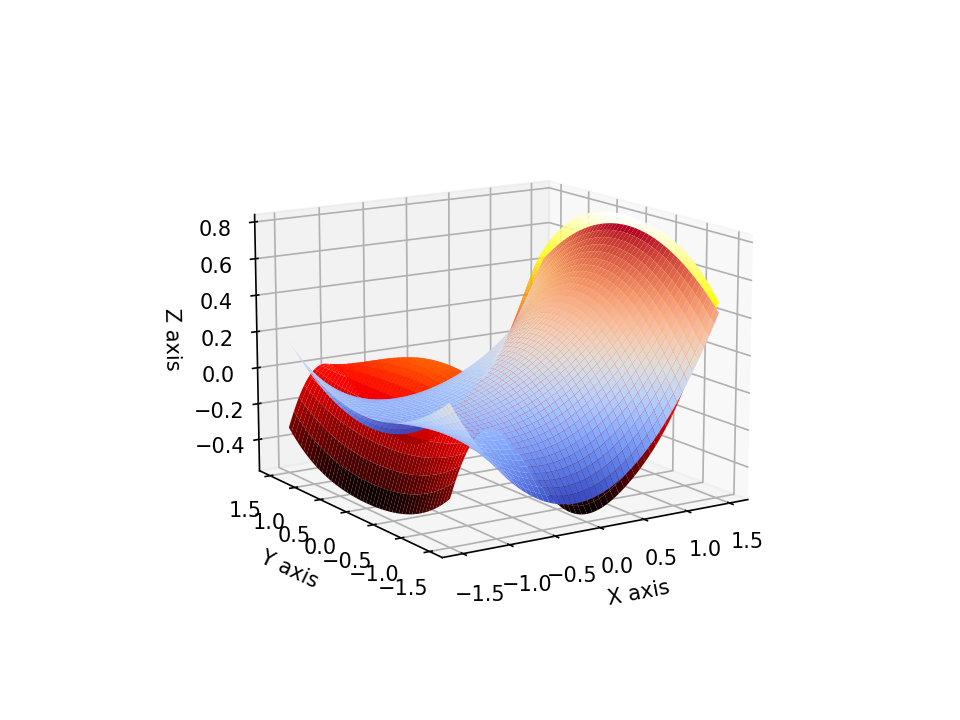

[ 0.08054895  0.27699869  0.          0.11189565 -0.          0.09966795
 -0.24065157 -0.08561474 -0.        ]


In [28]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

x = np.linspace(-1.5,1.5,500)
y = np.linspace(-1.5,1.5,500)

X, Y = np.meshgrid(x, y, copy=False)

#Z = X**2 + Y**2 + np.random.rand(*X.shape)*0.01
Z=np.sin(0.5*X**2-0.25*Y**2)*np.cos(2*x+1-np.exp(y))

#Make a 3D plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z,linewidth=0,cmap='hot')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')





X = X.flatten()
Y = Y.flatten()

A = np.array([X*0+1, X, Y, X**2, X**2*Y, X**2*Y**2, Y**2, X*Y**2, X*Y]).T
B = Z.flatten()

coeff, r, rank, s = np.linalg.lstsq(A, B,rcond=None)
print(coeff)
#print(r)
#print(rank)
#print(s)


x = np.linspace(-1.5,1.5,500)
y = np.linspace(-1.5,1.5,500)

X, Y = np.meshgrid(x, y, copy=False)
Z= 1*coeff[0] + X*coeff[1]+ Y*coeff[2]+ coeff[3]*X**2+ coeff[4]*X**2*Y+ coeff[5]*X**2*Y**2+ coeff[6]*Y**2+ coeff[7]*X*Y**2 + coeff[8]*X*Y 
ax.plot_surface(X, Y, Z,linewidth=0, cmap='coolwarm')
plt.show()



In [34]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x = np.linspace(0, 1, 20)
y = np.linspace(0, 1, 20)
X, Y = np.meshgrid(x, y, copy=False)
X = X.flatten()
Y = Y.flatten()

# Generate noisy data
np.random.seed(0)
#Z = X**2 + Y**2 + np.random.randn(*X.shape)*0.01
Z = np.sin(0.5*X**2-0.25*Y**2)*np.cos(2*x+1-np.exp(y))


# Process 2D inputs
poly = PolynomialFeatures(degree=2)
input_pts = np.stack([X, Y]).T
assert(input_pts.shape == (400, 2))
in_features = poly.fit_transform(input_pts)

# Linear regression
model = LinearRegression()
model.fit(in_features, Z)

# Display coefficients
print(dict(zip(poly.get_feature_names_out(), model.coef_.round(4))))

# Check fit
print(f"R-squared: {model.score(poly.transform(input_pts), Z):.3f}")

# Make predictions
Z_predicted = model.predict(poly.transform(input_pts))

ValueError: operands could not be broadcast together with shapes (400,) (20,) 

Refs [1](https://stackoverflow.com/questions/33964913/equivalent-of-polyfit-for-a-2d-polynomial-in-python)